In [4]:
#libraries
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [5]:
#get data from yahoo of any company
data_frame=web.DataReader('AAPL',data_source='yahoo',start='2010-01-01',end='2021-12-31')

In [6]:
#see the data
data_frame

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452590
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553027
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564355
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459940
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447998
...,...,...,...,...,...,...
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,180.330002
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,179.289993
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,179.380005


In [7]:
#rows and columns
data_frame.shape

(3022, 6)

<AxesSubplot:xlabel='Date'>

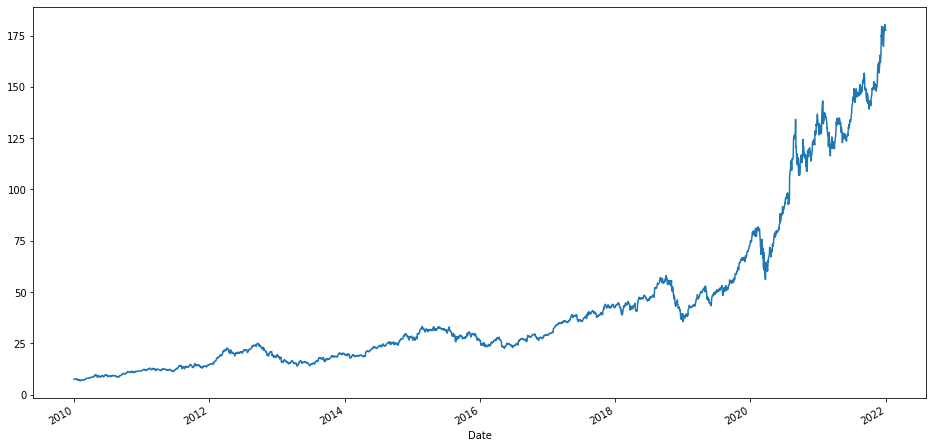

In [8]:
#see how the data looks like graphically
data_frame['Close'].plot(figsize=(16,8))

In [9]:
#get the close price of the stock data in a numpy array
data_close=data_frame.filter(['Close'])
data_close_set=data_close.values
#training set 80% of the data
training_data_len=math.ceil(len(data_close)*0.8)
training_data_len


2418

In [10]:
#scaling  the data
scale=MinMaxScaler(feature_range=(0,1))
scaled_data=scale.fit_transform(data_close)
scaled_data

array([[0.00384584],
       [0.00452113],
       [0.00459731],
       ...,
       [0.9945236 ],
       [0.98772127],
       [0.9840896 ]])

In [11]:
training_data=scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]
for i in range(100,len(training_data)):
    x_train.append(training_data[i-100:i,0])
    y_train.append(training_data[i,0])
    if i<=100:
        print(x_train)
        print(y_train)
        print()

[array([3.84583956e-03, 4.52112883e-03, 4.59730631e-03, 3.89525473e-03,
       3.81495680e-03, 4.10319040e-03, 3.71819907e-03, 3.22613926e-03,
       3.82936876e-03, 3.57819722e-03, 2.85761599e-03, 4.73318495e-03,
       4.05172463e-03, 3.29819628e-03, 1.17351464e-03, 2.26879845e-03,
       2.85967484e-03, 3.25908362e-03, 1.49056939e-03, 2.05610186e-06,
       5.51755483e-04, 7.84400109e-04, 1.47821629e-03, 0.00000000e+00,
       7.02046083e-04, 4.26168341e-04, 8.52342181e-04, 6.32047909e-04,
       1.36292340e-03, 1.71498136e-03, 2.33674052e-03, 2.16174371e-03,
       2.23997454e-03, 1.98056485e-03, 1.72321402e-03, 1.03145669e-03,
       1.77262918e-03, 2.04850692e-03, 2.58791205e-03, 3.48761329e-03,
       3.45878938e-03, 3.55760597e-03, 3.84172186e-03, 5.53817907e-03,
       5.56494413e-03, 6.37611204e-03, 6.75081187e-03, 6.88669051e-03,
       7.11316408e-03, 6.54493505e-03, 6.67051944e-03, 6.60258012e-03,
       6.71169645e-03, 6.21758329e-03, 6.73228496e-03, 7.47551080e-03,
     

In [12]:
#convert training datasets to numpy and reshaping the data
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2318, 100, 1)

In [13]:
#lstm model
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [14]:
#running the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [15]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

2318/2318 [==============================] - 59s 24ms/step - loss: 1.3561e-04


In [16]:
#creating test-data set
test_data=scaled_data[training_data_len-100:,:]
x_test=[]
y_test=data_close_set[training_data_len:,:]
for i in range(100,len(test_data)):
    x_test.append(test_data[i-100:i,0])

In [17]:
#make data into numpy
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [18]:
#Get the predicted price of the stock
predictions=model.predict(x_test)
predictions=scale.inverse_transform(predictions)

In [19]:
#get root mean squared error
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse


5.571089639677424

In [20]:
#plot data
train=data_close[:training_data_len]
valid=data_close[training_data_len:]
valid['Predictions']=predictions


C:\Users\risha\AppData\Local\Temp\ipykernel_16308\1090442803.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


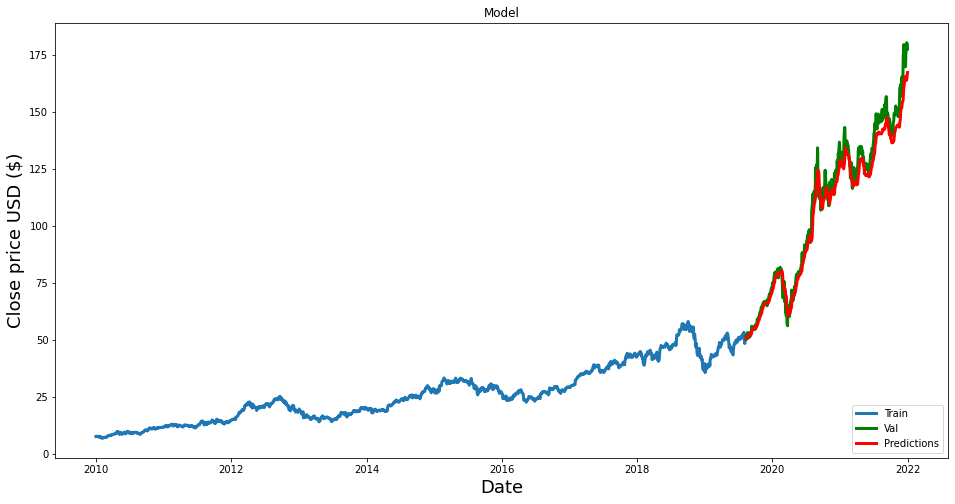

In [21]:
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD ($)',fontsize=18)
plt.plot(train['Close'],linewidth=3)
plt.plot(valid['Close'],color='Green',linewidth=3,label='Closed Prices')
plt.plot(valid['Predictions'],color='red',linewidth=3,label='Predictions')
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()


In [22]:
valid

,Close,Predictions
Date,,
2019-08-12,50.119999,50.451950
2019-08-13,52.242500,50.361786
2019-08-14,50.687500,50.554104
2019-08-15,50.435001,50.674065
2019-08-16,51.625000,50.718227
...,...,...
2021-12-27,180.330002,164.054916
2021-12-28,179.289993,165.007675
2021-12-29,179.380005,165.926193


In [23]:
#Analysis on last 100 days to predict the price of the stock
stock_data = web.DataReader('AAPL', data_source='yahoo', start='2010-01-01', end='2021-12-31')
stock_data_close = stock_data.filter(['Close'])
stock_data_close_set = stock_data_close[-100:].values
days_scaled = scale.transform(stock_data_close_set)
X_test_sample = []
X_test_sample.append(days_scaled)
X_test_sample = np.array(X_test_sample)
X_test_sample= np.reshape(X_test_sample, (X_test_sample.shape[0], X_test_sample.shape[1], 1))
predicted_price = model.predict(X_test_sample)
predicted_price = scale.inverse_transform(predicted_price)
print(predicted_price)


[[167.45612]]


D:\VS CODE\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [24]:
stock_data_actual = web.DataReader('AAPL', data_source='yahoo', start='2022-01-01', end='2022-01-01')
print(stock_data_actual['Close'])



Date
2021-12-31    177.570007
Name: Close, dtype: float64


In [27]:
#accuracy
print("Accuracy of the model is:")
print(predicted_price[0][0]/stock_data_actual['Close'][0]*100)

94.30427933525063
